# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [87]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

In [88]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

### Step 3. Assign it to a variable called drinks.

In [113]:
df_drinks = pd.read_csv(filepath_or_buffer=url)

In [114]:
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [115]:
#pero realmente no es nan, sino que es NA pero lo ha interpretando mal, como not a number
df_drinks.fillna(value='NA', inplace=True) #el inplace es para no tener que reasignar la variable, sino directamente la modifica.

### Step 4. Which continent drinks more beer on average?

In [116]:
df_beer = df_drinks.sort_values('beer_servings', ascending=False)

In [117]:
df_beer

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
65,Germany,346,117,175,11.3,EU
98,Lithuania,343,244,56,12.9,EU
...,...,...,...,...,...,...
107,Mauritania,0,0,0,0.0,AF
158,Somalia,0,0,0,0.0,AF
111,Monaco,0,0,0,0.0,EU
128,Pakistan,0,0,0,0.0,AS


In [118]:
df_beer.reset_index()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,117,Namibia,376,3,1,6.8,AF
1,45,Czech Republic,361,170,134,11.8,EU
2,62,Gabon,347,98,59,8.9,AF
3,65,Germany,346,117,175,11.3,EU
4,98,Lithuania,343,244,56,12.9,EU
...,...,...,...,...,...,...,...
188,107,Mauritania,0,0,0,0.0,AF
189,158,Somalia,0,0,0,0.0,AF
190,111,Monaco,0,0,0,0.0,EU
191,128,Pakistan,0,0,0,0.0,AS


In [119]:
df_beer.reset_index().query('country == "Spain"')  #para saber qué posición ocupa España

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
12,160,Spain,284,157,112,10.0,EU


In [120]:
df_drinks.groupby(by='continent').mean() #groupby genera un dataframe para cada categoría de 'continent'

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [121]:
df_g = df_drinks.groupby(by='continent')

In [122]:
df_eu = df_g.get_group('EU')

In [123]:
df_af = df_g.get_group('AF')

In [124]:
df_eu

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [125]:
import matplotlib.pyplot as plt

Text(50, 25, 'Hola')

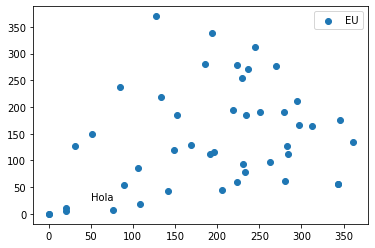

In [126]:
plt.scatter(x=df_eu.beer_servings, y=df_eu.wine_servings, label='EU')
plt.legend() #Es raro pero es así: hay que llamar a esta función para que se active el label sobre la misma gráfica.
plt.text(x=50, y=25, s='Hola')

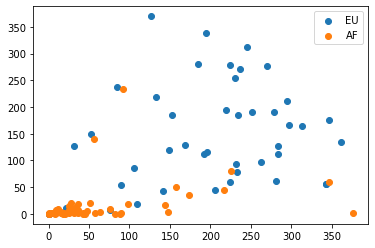

In [127]:
plt.scatter(x=df_eu.beer_servings, y=df_eu.wine_servings, label='EU')
plt.scatter(x=df_af.beer_servings, y=df_af.wine_servings, label='AF')
plt.legend()

In [128]:
#juanes = df_drinks.dropna().continent.unique()    #si pones el dropna() al final peta
juanes = df_drinks.continent.unique()  
juanes

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

In [110]:
#pero realmente no es nan, sino que es NA pero lo ha interpretando mal, como not a number
#df_drinks.fillna(value='NA', inplace=True) #el inplace es para no tener que reasignar la variable, sino directamente la modifica.

In [129]:
juanes = df_drinks.continent.unique()  #si pones el dropna() al final peta
juanes

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

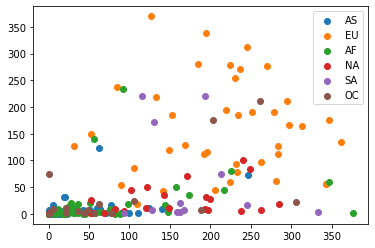

In [130]:
for juan in juanes:
    pepa = df_g.get_group(juan)
    plt.scatter(x=pepa.beer_servings, y=pepa.wine_servings, label = juan)
plt.legend()

### Step 5. For each continent print the statistics for wine consumption.

### Step 6. Print the mean alcohol consumption per continent for every column

### Step 7. Print the median alcohol consumption per continent for every column

### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame